# CHAPTER 3  
***  
# Writing Web Crawlers  
<br>  
<br>

 scrapers used in previous examples work great in situations where all the data you need is on a single page.  
 #### Traversing a Single Domain  
  - there are some things that you don’t want as well:  
  //wikimediafoundation.org/wiki/Privacy_policy  
  //en.wikipedia.org/wiki/Wikipedia:Contact_us  
  - Wikipedia is full of sidebar, footer, and header links that appear on every page.  
  /wiki/Category:Articles_with_unsourced_statements_from_April_2014   
  /wiki/Talk:Kevin_Bacon

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup 

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Wikipedia:Protection_policy#semi
#mw-head
#p-search
/wiki/Kevin_Bacon_(disambiguation)
/wiki/File:Kevin_Bacon_TIFF_2015.jpg
/wiki/Philadelphia
/wiki/Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
#cite_note-1
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
http://baconbros.com/
#cite_note-2
#cite_note-actor-3
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(film)
/wiki/Tremors_(film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/X-Men:_First_Class
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/w

#### Retrieving Articles Only  

 - They reside within the div with the id set to bodyContent.
 - The URLs do not contain colons.
 - The URLs begin with /wiki/.  
 
 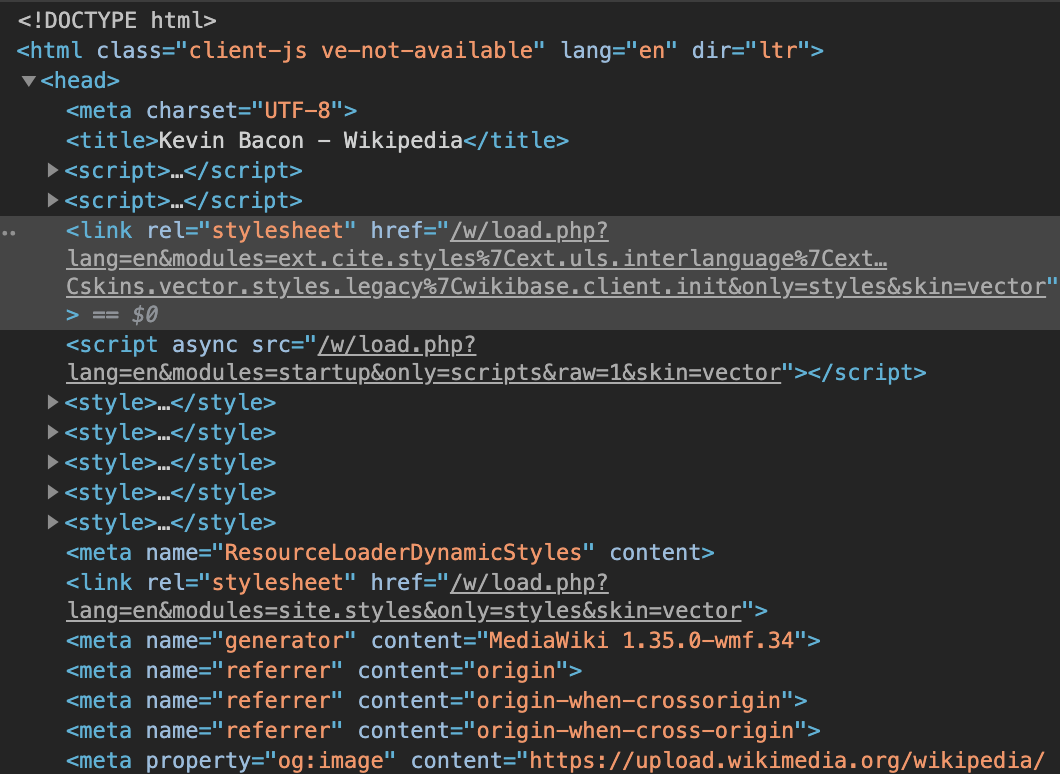

In [2]:
from urllib.request import urlopen 
from bs4 import BeautifulSoup 
import re

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find('div', {'id':'bodyContent'}).find_all(
    'a', href=re.compile('^(/wiki/)((?!:).)*$')):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia
/wiki/Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(film)
/wiki/Tremors_(film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/I_Love_Dick_(TV_series)
/wiki/Golden_Globe_Award_for_Best_Actor_%E2%80%93_Television_Series_Musical_or_Comedy
/wiki/The_Guardian
/wiki/Academy_Award
/wiki/Hollywood_Walk_of_Fame
/wiki

In [ ]:
# importing the needed libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re
# is set the random-number generator seed with the current system time
random.seed(datetime.datetime.now())

# Next, the program defines the getLinks function
# takes in an article URL of the form /wiki/...
# http://en.wikipe dia.org, and retrieves the BeautifulSoup object for the HTML at that domain
# extracts a list of article link tags, based on the parameters.
def getLinks(articleUrl):
    html = urlopen('http://en.wikipedia.org{}'.format(articleUrl))
    bs = BeautifulSoup(html, 'html.parser')
    return bs.find('div', {'id':'bodyContent'}).find_all('a', href=re.compile('^(/wiki/)((?!:).)*$'))

# list of article link tags 
# to the list of links in the initial page: https://en.wikipedia.org/wiki/Kevin_Bacon
# then goes into a loop, finding a random article link tag in the page,
# extracting the href attribute from it, printing the page,
# getting a new list of links from the extracted URL.
links = getLinks('/wiki/Kevin_Bacon')
while len(links) > 0:
    newArticle = links[random.randint(0, len(links)-1)].attrs['href']
    print(newArticle)
    links = getLinks(newArticle)


#### Handle Your Exceptions!  
What if Wikipedia changes the name of the bodyContent tag

#### Crawling an Entire Site  
***  
 - what if you need to systematically catalog or search every page on a site?  
  - Generating a site map.  
  - Gathering data
 - when might it be harmful?  
  -  
  
<br>  
To avoid crawling the same page twice, it is extremely important that all internal links discovered are formatted consistently, and kept in a running set for easy lookups,  
  
it looks for all links that begin with /wiki/, regardless of where they are on the page, and regardless of whether they contain colons.  
  
 - Python has a default recursion limit (the number of times a program can recursively call itself) of 1,000

#### Recursively crawling an entire site  
***

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages = set()

# Initially, getLinks is called with an empty URL
def getLinks(pageUrl):
    global pages
    
    # URL is prepended with http://en.wikipe dia.org inside the function
    html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
    bs = BeautifulSoup(html, 'html.parser')
    for link in bs.find_all('a', href=re.compile('^(/wiki/)')):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                #We have encountered a new page
                newPage = link.attrs['href']
                print(newPage)
                pages.add(newPage)
                getLinks(newPage)
getLinks('')

/wiki/Wikipedia
/wiki/Wikipedia:Protection_policy#semi
/wiki/Wikipedia:Requests_for_page_protection
/wiki/Wikipedia:Protection_policy#move
/wiki/Wikipedia:Lists_of_protected_pages
/wiki/Wikipedia:Protection_policy
/wiki/Wikipedia:Perennial_proposals
/wiki/Wikipedia:Reliable_sources/Perennial_sources
/wiki/Wikipedia:Reliable_sources
/wiki/Wikipedia:WikiProject_Reliability
/wiki/Wikipedia:WRE
/wiki/File:People_icon.svg
/wiki/Special:WhatLinksHere/File:People_icon.svg
/wiki/Help:What_links_here
/wiki/Wikipedia:Project_namespace#How-to_and_information_pages
/wiki/Wikipedia:Policies_and_guidelines
/wiki/Wikipedia:WikiProject_Politics
/wiki/File:A_coloured_voting_box.svg
/wiki/Wikipedia:Protection_policy#full
/wiki/Wikipedia:WikiProject_Parliamentary_Procedure
/wiki/File:People_icon_dead.svg
/wiki/User:StevenDH
/wiki/Wikipedia:User_pages
/wiki/Wikipedia:Protection_policy#extended
/wiki/Wikipedia:Party_and_person
/wiki/File:Essay.svg
/wiki/File:Essay.png
/wiki/File:To_Commons.svg
/wiki/Specia

/wiki/File:WikipediaSignpostIcon.svg
/wiki/Special:WhatLinksHere/File:WikipediaSignpostIcon.svg
/wiki/Wikipedia_talk:WikiProject_Elements
/wiki/Wikipedia:WikiProject_Elements/Participants/Noticeboard/archive
/wiki/Wikipedia:WikiProject_Elements
/wiki/Wikipedia:WikiProject_Elements/Guidelines
/wiki/Wikipedia:WikiProject_Elements/Templates
/wiki/Special:RecentChangesLinked/Wikipedia:WikiProject_Elements/Templates/List_of_templates
/wiki/Wikipedia:WikiProject_Elements/Templates/List_of_templates
/wiki/Category:WikiProject_Elements_articles
/wiki/Category:Chemical_element_isotope_articles_by_quality
/wiki/Wikipedia:Version_1.0_Editorial_Team/Assessment
/wiki/Wikipedia:CLASS
/wiki/Wikipedia:ASSESS
/wiki/Category:Wikipedia_editing_guidelines
/wiki/Wikipedia:Categorization#Non-article_and_maintenance_categories
/wiki/Wikipedia:HotCat
/wiki/Wikipedia:Blocking_policy
/wiki/Help:I_have_been_blocked
/wiki/Wikipedia:Blocking_policy#Evasion_and_enforcement
/wiki/Wikipedia:Appealing_a_block
/wiki/Wi

KeyboardInterrupt: 

 - build a scraper that collects the title, the first paragraph of content, and the link to edit the page (if available).  
  - have titles under h1 → span tags, and these are the only h1 tags on the page.  
  - body text lives under the div#bodyContent tag.  
  - might be better off using div#mw-content-text → p (selecting the first para‐ graph tag only).  
  
  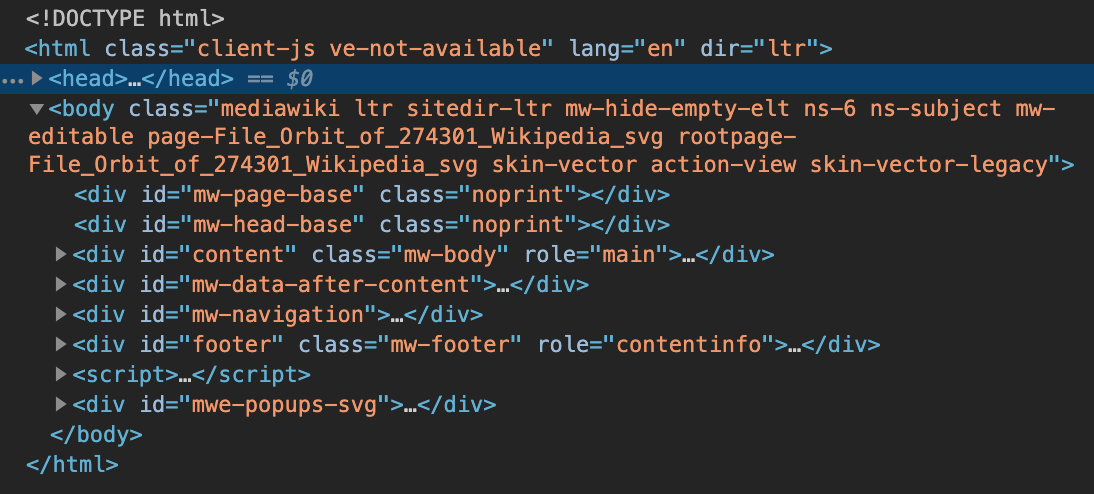  
  
  do not have sections of content text.  
  -  Edit links occur only on article pages. If they occur, they will be found in the li#ca-edit tag, under li#ca-edit → span → a.  
   
 -  you can never be entirely sure that all the data is on each page, each print statement is arranged in the order that it is likeliest to appear on the site.  
 - h1 title tag appears on every page  -> get that data first.
 - The text content appears on most pages (except for file pages) -> 2nd piece of data retrieved.  
 -  Edit button appears only on pages in which both titles and text content already exist, but it does not appear on all of those pages.


#### Collecting Data Across an Entire Site  
***


In [ ]:
# modifying our basic crawling code, 
# you can create a combination crawler/datagathering (or, at least, data-printing) program:

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages = set()
def getLinks(pageUrl):
    global pages
    html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
    bs = BeautifulSoup(html, 'html.parser')
    try:
        print(bs.h1.get_text())
        print(bs.find(id ='mw-content-text').find_all('p')[0])
        print(bs.find(id='ca-edit').find('span').find('a').attrs['href'])
    except AttributeError:
        print('This page is missing something! Continuing.')
    
    # for loop in this program is the same as it was in the original crawling program
    for link in bs.find_all('a', href=re.compile('^(/wiki/)')):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                #We have encountered a new page
                newPage = link.attrs['href']
                print('-'*20)    # with the addition of printed dashes for clarity
                print(newPage)
                pages.add(newPage)
                getLinks(newPage)
getLinks('')

#### Handling Redirects. 
***  
2 types of redirects
 - Server-side redirects, where the URL is changed before the page is loaded.  
 - Client-side redirects, sometimes seen with a “You will be redirected in 10 seconds” type of message, where the page loads before redirecting to the new one.  
 
<br> 
 - With server-side redirects, you usually don’t have to worry.  
  - If you’re using the urllib library with Python 3.x, it handles redirects automatically!   
  - If you’re using the requests library, make sure to set the allow-redirects flag to True:<font color=pink>r = requests.get('http://github.com', allow_redirects=True)</font>  
 - more information on client-side redirects, which are performed using JavaScript or HTML, see <font color=green>Chapter 12</font>.

#### Crawling across the Internet  
***  
 - What data am I trying to gather?  
 - When my crawler reaches a particular website, will it immediately follow the next outbound link to a new website, or will it stick around?  
 - Are there any conditions under which I would not want to scrape a particular site? Am I interested in non-English content?  
 - How am I protecting myself against legal action if my web crawler catches the attention of a webmaster on one of the sites it runs across<font color=green>Chapter 18</font>  
 
 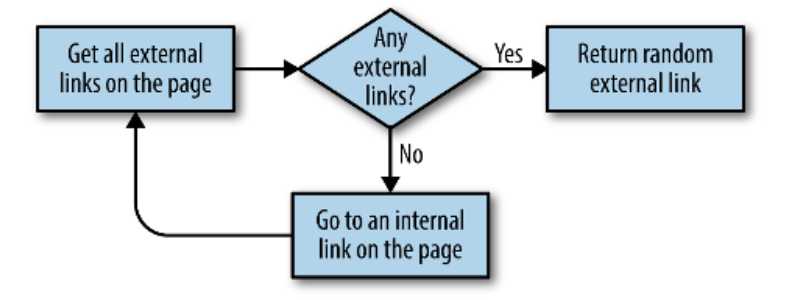

In [4]:
from urllib.request import urlopen
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import re
import datetime
import random

pages = set()
random.seed(datetime.datetime.now())

#Retrieves a list of all Internal links found on a page
def getInternalLinks(bs, includeUrl):
    includeUrl = '{}://{}'.format(urlparse(includeUrl).scheme, urlparse(includeUrl).netloc)
    internalLinks = []
    #Finds all links that begin with a "/"
    for link in bs.find_all('a', href=re.compile('^(/|.*'+includeUrl+')')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in internalLinks:
                if(link.attrs['href'].startswith('/')):
                    internalLinks.append(includeUrl+link.attrs['href'])
                else:
                    internalLinks.append(link.attrs['href'])
    return internalLinks
            
#Retrieves a list of all external links found on a page
def getExternalLinks(bs, excludeUrl):
    externalLinks = []
    #Finds all links that start with "http" that do
    #not contain the current URL
    for link in bs.find_all('a', href=re.compile('^(http|www)((?!'+excludeUrl+').)*$')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in externalLinks:
                externalLinks.append(link.attrs['href'])
    return externalLinks

def getRandomExternalLink(startingPage):
    html = urlopen(startingPage)
    bs = BeautifulSoup(html, 'html.parser')
    externalLinks = getExternalLinks(bs, urlparse(startingPage).netloc)
    if len(externalLinks) == 0:
        print('No external links, looking around the site for one')
        domain = '{}://{}'.format(urlparse(startingPage).scheme, urlparse(startingPage).netloc)
        internalLinks = getInternalLinks(bs, domain)
        return getRandomExternalLink(internalLinks[random.randint(0,
                                    len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0, len(externalLinks)-1)]

#and randomly hops from external link to external link. 
def followExternalOnly(startingSite):    
    externalLink = getRandomExternalLink(startingSite)
    print('Random external link is: {}'.format(externalLink))
    followExternalOnly(externalLink)
            
followExternalOnly('http://oreilly.com') # The preceding program starts at http://oreilly.com 

Random external link is: https://itunes.apple.com/us/app/safari-to-go/id881697395
Random external link is: https://www.apple.com/legal/privacy/
Random external link is: https://support.apple.com
Random external link is: https://www.apple.com/music/
Random external link is: https://covid19.apple.com/screening/
No external links, looking around the site for one


ValueError: empty range for randrange() (0,0, 0)

#### Don’t Put Example Programs into Production
*** 
 - the example programs in this book do not always contain the necessary checks and exception handling required for production-ready code.  
 - if an external link is not found anywhere on a site that this crawler encounters this program will keep running until it hits Python’s recursion limit.  
 - One easy way to increase the robustness of this crawler would be to combine it with the connection exception-handling code in <font color=green>Chapter 1</font>.

#### Collect all External Links from a Site  
***  
 - if your goal is to crawl an entire site for external links, and make a note of each one, you can add the following function:  
 - This code can be thought of as two loops  
  - one gathering internal links.  
  -  one gathering external links—working in conjunction with each other. 

 -flow chart. 

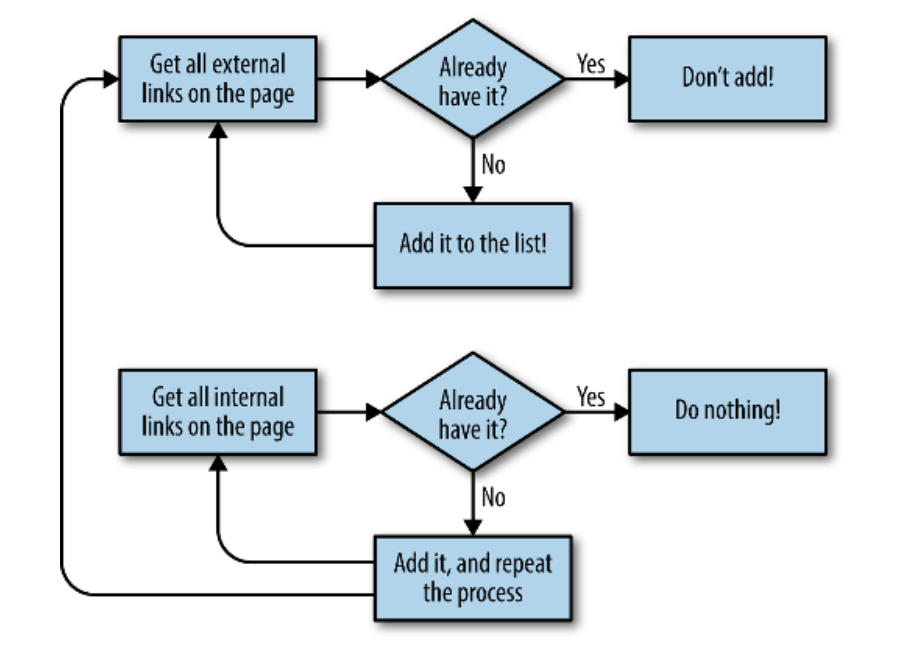


In [5]:
# Collects a list of all external URLs found on the site
allExtLinks = set()
allIntLinks = set()


def getAllExternalLinks(siteUrl):
    html = urlopen(siteUrl)
    domain = '{}://{}'.format(urlparse(siteUrl).scheme,
                              urlparse(siteUrl).netloc)
    bs = BeautifulSoup(html, 'html.parser')
    internalLinks = getInternalLinks(bs, domain)
    externalLinks = getExternalLinks(bs, domain)

    for link in externalLinks:
        if link not in allExtLinks:
            allExtLinks.add(link)
            print(link)
    for link in internalLinks:
        if link not in allIntLinks:
            allIntLinks.add(link)
            getAllExternalLinks(link)


allIntLinks.add('http://oreilly.com')
getAllExternalLinks('http://oreilly.com')


https://www.oreilly.com
https://www.oreilly.com/online-learning/enterprise.html
https://learning.oreilly.com/accounts/login-check/
https://www.oreilly.com/online-learning/try-now.html
https://www.oreilly.com/online-learning/index.html
https://www.oreilly.com/online-learning/individuals.html
https://www.oreilly.com/online-learning/teams.html
https://www.oreilly.com/online-learning/government.html
https://www.oreilly.com/online-learning/academic.html
https://www.oreilly.com/online-learning/features.html
https://www.oreilly.com/online-learning/custom-services.html
https://www.oreilly.com/online-learning/pricing.html
https://www.oreilly.com/whats-new.html
https://learning.oreilly.com/interactive/
https://www.oreilly.com/online-learning/government-free-access.html
https://www.oreilly.com/online-learning/navigate-change/nb.html
https://learning.oreilly.com/register/
https://learning.oreilly.com/team-setup/
https://www.oreilly.com/about/approach.html
https://twitter.com/oreillymedia
https://w

HTTPError: HTTP Error 404: Not Found